# The ultimate movie recommendation system

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#loading the data into pandas dataframe

In [3]:
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


### Do some EDA

In [4]:
ratings.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [5]:
ratings.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [6]:
movieRatings = pd.DataFrame(ratings.groupby('title')['rating'].mean())
movieRatings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [7]:
movieRatings['frequency'] = pd.DataFrame(ratings.groupby('title')['rating'].count())
movieRatings.head()

,rating,frequency
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

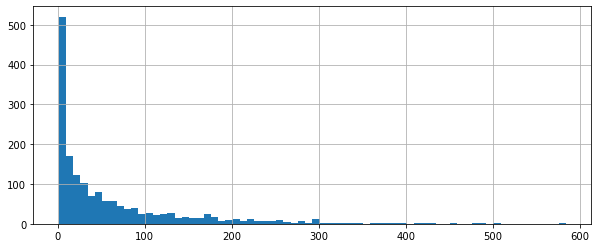

In [8]:
plt.figure(figsize = (10,4))
movieRatings['frequency'].hist(bins = 70)

<AxesSubplot:>

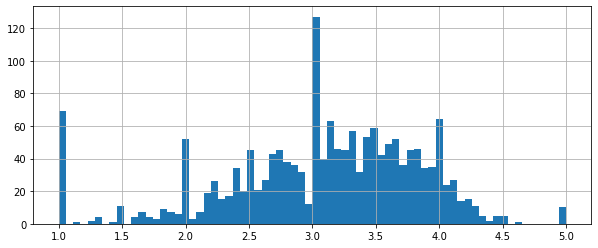

In [9]:
plt.figure(figsize = (10,4))
movieRatings['rating'].hist(bins = 70)

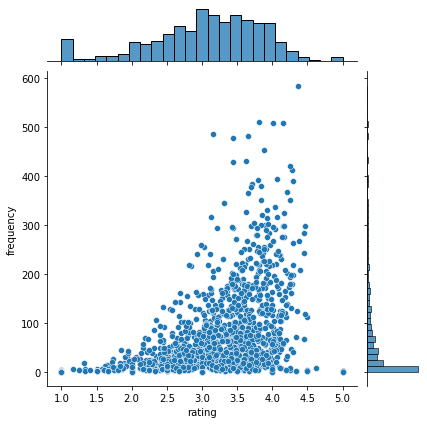

In [10]:
sns.jointplot(x='rating', y='frequency', data = movieRatings)

### Recommendation system

Create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [11]:
userRatings = ratings.pivot_table(index='user_id',columns='title',values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#most rated movies with their average ratings
movieRatings.sort_values('frequency', ascending = False).head()

,rating,frequency
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


# Recomended movies based on the user

The pandas has a built-in corr() method that will compute a correlation score for every column pair in the matrix! This gives us a correlation score between every pair of movies (where at least one user rated both movies - otherwise NaN's will show up.) 

In [13]:
corrMatrix=userRatings.corr()
corrMatrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000e+00,-0.500000,-0.500000,0.522233,NaN,-4.264014e-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-9.819805e-01,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000e+00,-0.049890,0.269191,0.048973,0.266928,-4.340657e-02,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,-4.875600e-17,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-4.989024e-02,1.000000,0.666667,0.256625,0.274772,1.788483e-01,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,1.443376e-01,1.000000,1.0,NaN
187 (1997),-0.5,NaN,2.691910e-01,0.666667,1.000000,0.596644,NaN,-5.547002e-01,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,4.753271e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,6.804138e-01,-0.361961,0.500000,0.132017,-0.518476,-1.547646e-01,NaN,-0.054554,...,NaN,NaN,NaN,0.355001,0.722460,1.000000,8.660254e-01,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,-4.875600e-17,0.144338,0.475327,0.204926,0.623795,-3.417534e-01,NaN,0.707107,...,NaN,NaN,NaN,-0.413197,-0.019672,0.866025,1.000000e+00,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,7.071068e-01,1.000000,NaN,NaN,NaN,-1.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


However, we want to avoid spurious results that happened from just a handful of users that happened to rate the same pair of movies. In order to restrict our results to movies that lots of people rated together - and also give us more popular results that are more easily recongnizable - we'll use the min_periods argument to throw out results where fewer than 100 users rated a given movie pair:

In [14]:
corrMatrix = userRatings.corr(method='pearson', min_periods=100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's produce some movie recommendations for any user, whom we manually added to the data set as a test case. I'll extract his ratings from the userRatings DataFrame, and use dropna() to get rid of missing data (leaving me only with a Series of the movies I actually rated.

In [22]:
results=userRatings.loc[0].dropna()
results

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

Now, let's go through each movie we rated one at a time, and build up a list of possible recommendations based on the movies similar to the ones we rated.

So for each movie we rated, We'll retrieve the list of similar movies from our correlation matrix. We'll then scale those correlation scores by how well we rated the movie they are similar to, so movies similar to ones we liked, count more than movies similar to ones we hated:

In [16]:
similar = pd.Series()
for i in range(0,len(results.index)):
    print ("Adding sims for " + results.index[i] + "...")
    sim = corrMatrix[results.index[i]].dropna()
    # Now scale its similarity by how well we rated this movie
    sim = sim.map(lambda x: x * results[i])
    similar = similar.append(sim)
    
similar.sort_values(inplace = True, ascending = False)
print ('The recommended movies are...' )
print (similar.head(10))

<ipython-input-16-7a84ea0d416c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similar = pd.Series()


Adding sims for 101 Dalmatians (1996)...
Adding sims for 12 Angry Men (1957)...
Adding sims for 20,000 Leagues Under the Sea (1954)...
Adding sims for 2001: A Space Odyssey (1968)...
Adding sims for Abyss, The (1989)...
Adding sims for Ace Ventura: Pet Detective (1994)...
Adding sims for Air Bud (1997)...
Adding sims for Akira (1988)...
Adding sims for Aladdin (1992)...
Adding sims for Alien (1979)...
Adding sims for Aliens (1986)...
Adding sims for All Dogs Go to Heaven 2 (1996)...
Adding sims for Amadeus (1984)...
Adding sims for Angels and Insects (1995)...
Adding sims for Antonia's Line (1995)...
Adding sims for Apocalypse Now (1979)...
Adding sims for Apollo 13 (1995)...
Adding sims for Aristocats, The (1970)...
Adding sims for Army of Darkness (1993)...
Adding sims for Austin Powers: International Man of Mystery (1997)...
Adding sims for Babe (1995)...
Adding sims for Back to the Future (1985)...
Adding sims for Bad Boys (1995)...
Adding sims for Basic Instinct (1992)...
Adding s

In [17]:
#some movies are show more than one times, to solve this we do a groupby
similar=similar.groupby(similar.index).sum()

In [18]:
similar.sort_values(inplace = True, ascending = False)
similar.head(10)

Raiders of the Lost Ark (1981)               115.630218
Back to the Future (1985)                    113.927926
Indiana Jones and the Last Crusade (1989)    100.752361
Fugitive, The (1993)                          96.951700
Return of the Jedi (1983)                     96.098239
Star Wars (1977)                              95.822282
Empire Strikes Back, The (1980)               93.544182
Toy Story (1995)                              91.288603
Terminator 2: Judgment Day (1991)             90.631513
Independence Day (ID4) (1996)                 87.497565
dtype: float64

The last thing we have to do is filter out movies I've already rated, as recommending a movie I've already watched isn't helpful:

In [23]:
filteredSims = similar.drop(results.index)
filteredSims.head(10)

Raiders of the Lost Ark (1981)               115.630218
Back to the Future (1985)                    113.927926
Indiana Jones and the Last Crusade (1989)    100.752361
Fugitive, The (1993)                          96.951700
Return of the Jedi (1983)                     96.098239
Toy Story (1995)                              91.288603
Terminator 2: Judgment Day (1991)             90.631513
Independence Day (ID4) (1996)                 87.497565
Braveheart (1995)                             85.855090
Jurassic Park (1993)                          85.551288
dtype: float64